In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold



In [84]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

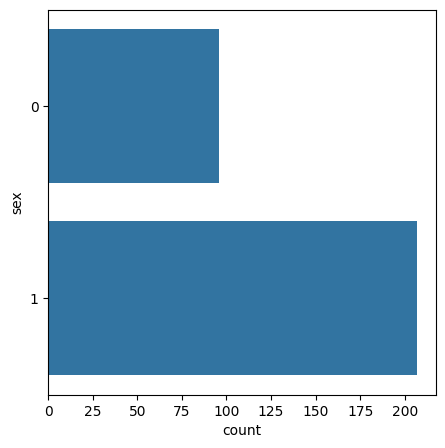

In [126]:
plt.figure(1,(5,5))
sns.countplot(data,y='sex')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

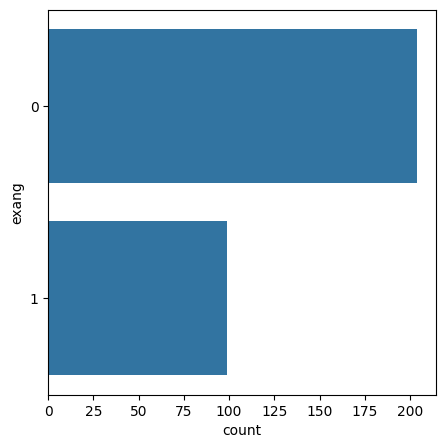

In [19]:
plt.figure(1,(5,5))
sns.countplot(data,y='exang')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

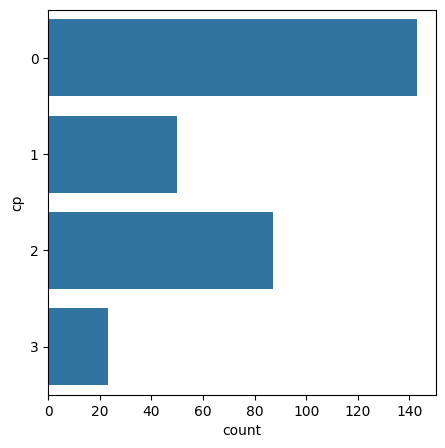

In [20]:
plt.figure(1,(5,5))
sns.countplot(data,y='cp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

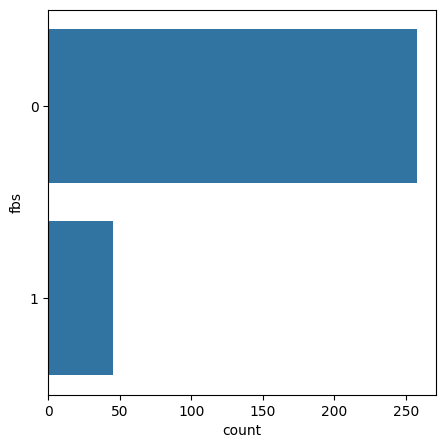

In [21]:
plt.figure(1,(5,5))
sns.countplot(data,y='fbs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

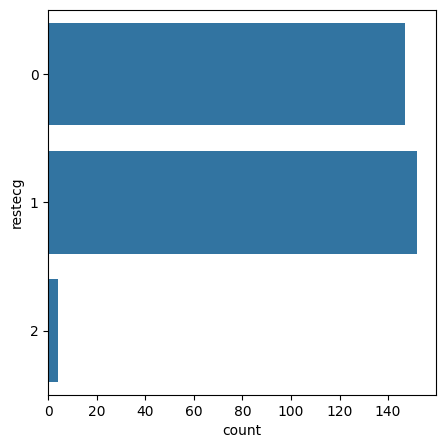

In [22]:
plt.figure(1,(5,5))
sns.countplot(data,y='restecg')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

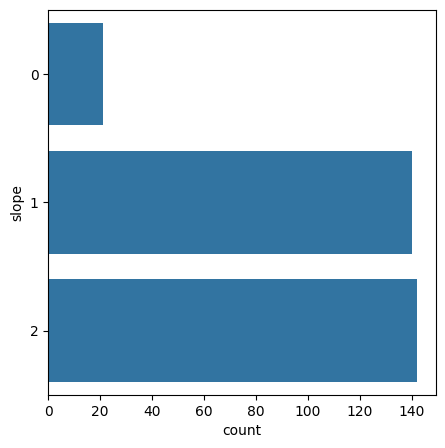

In [23]:
plt.figure(1,(5,5))
sns.countplot(data,y='slope')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

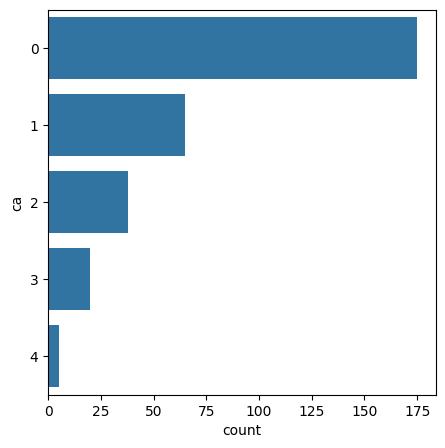

In [24]:
plt.figure(1,(5,5))
sns.countplot(data,y='ca')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

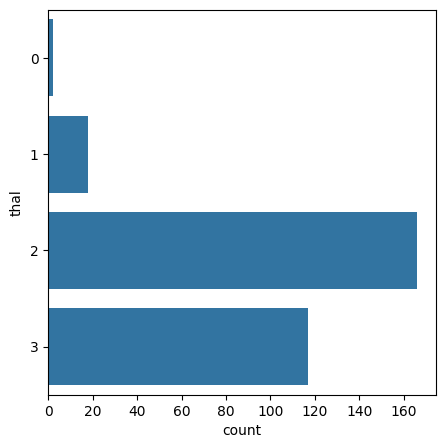

In [25]:
plt.figure(1,(5,5))
sns.countplot(data,y='thal')
plt.show

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\3368829919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["trestbps"], bins=15)


<Axes: xlabel='trestbps', ylabel='Density'>

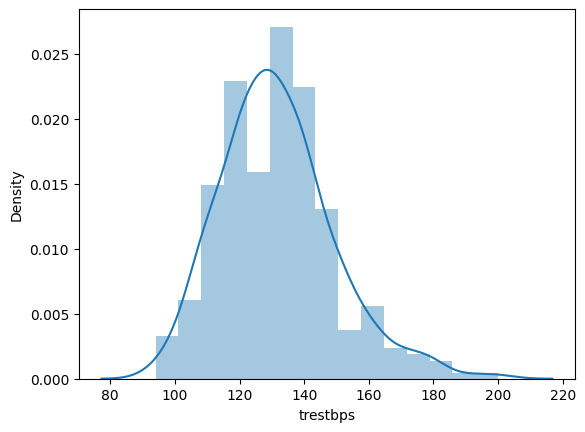

In [104]:
sns.distplot(data["trestbps"], bins=15)

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\2188535912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["chol"], bins=15)


<Axes: xlabel='chol', ylabel='Density'>

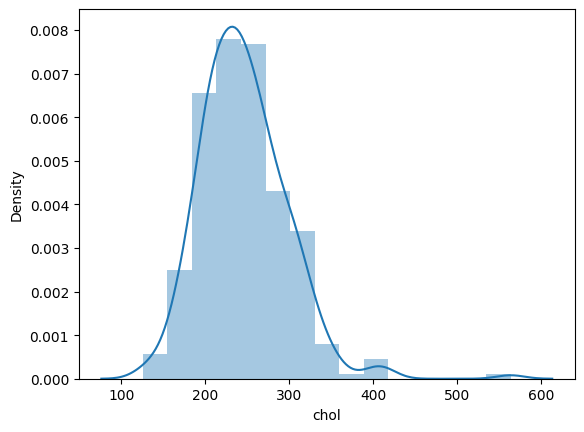

In [103]:
sns.distplot(data["chol"], bins=15)

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\329976073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thalach"], bins=15)


<Axes: xlabel='thalach', ylabel='Density'>

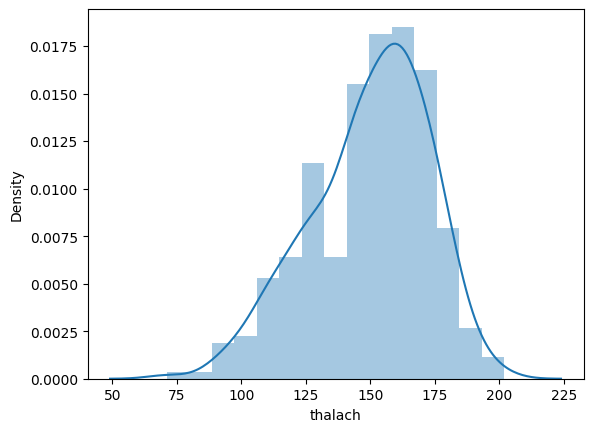

In [102]:
sns.distplot(data["thalach"], bins=15)

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\1875611485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["oldpeak"], bins=15)


<Axes: xlabel='oldpeak', ylabel='Density'>

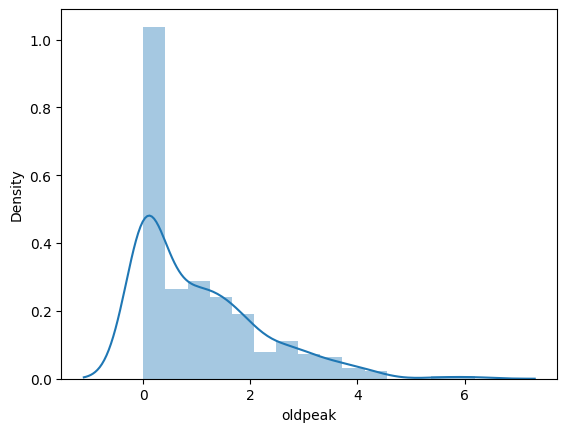

In [101]:
sns.distplot(data["oldpeak"], bins=15)

Text(0.5, 1.05, 'Heatmap Plot')

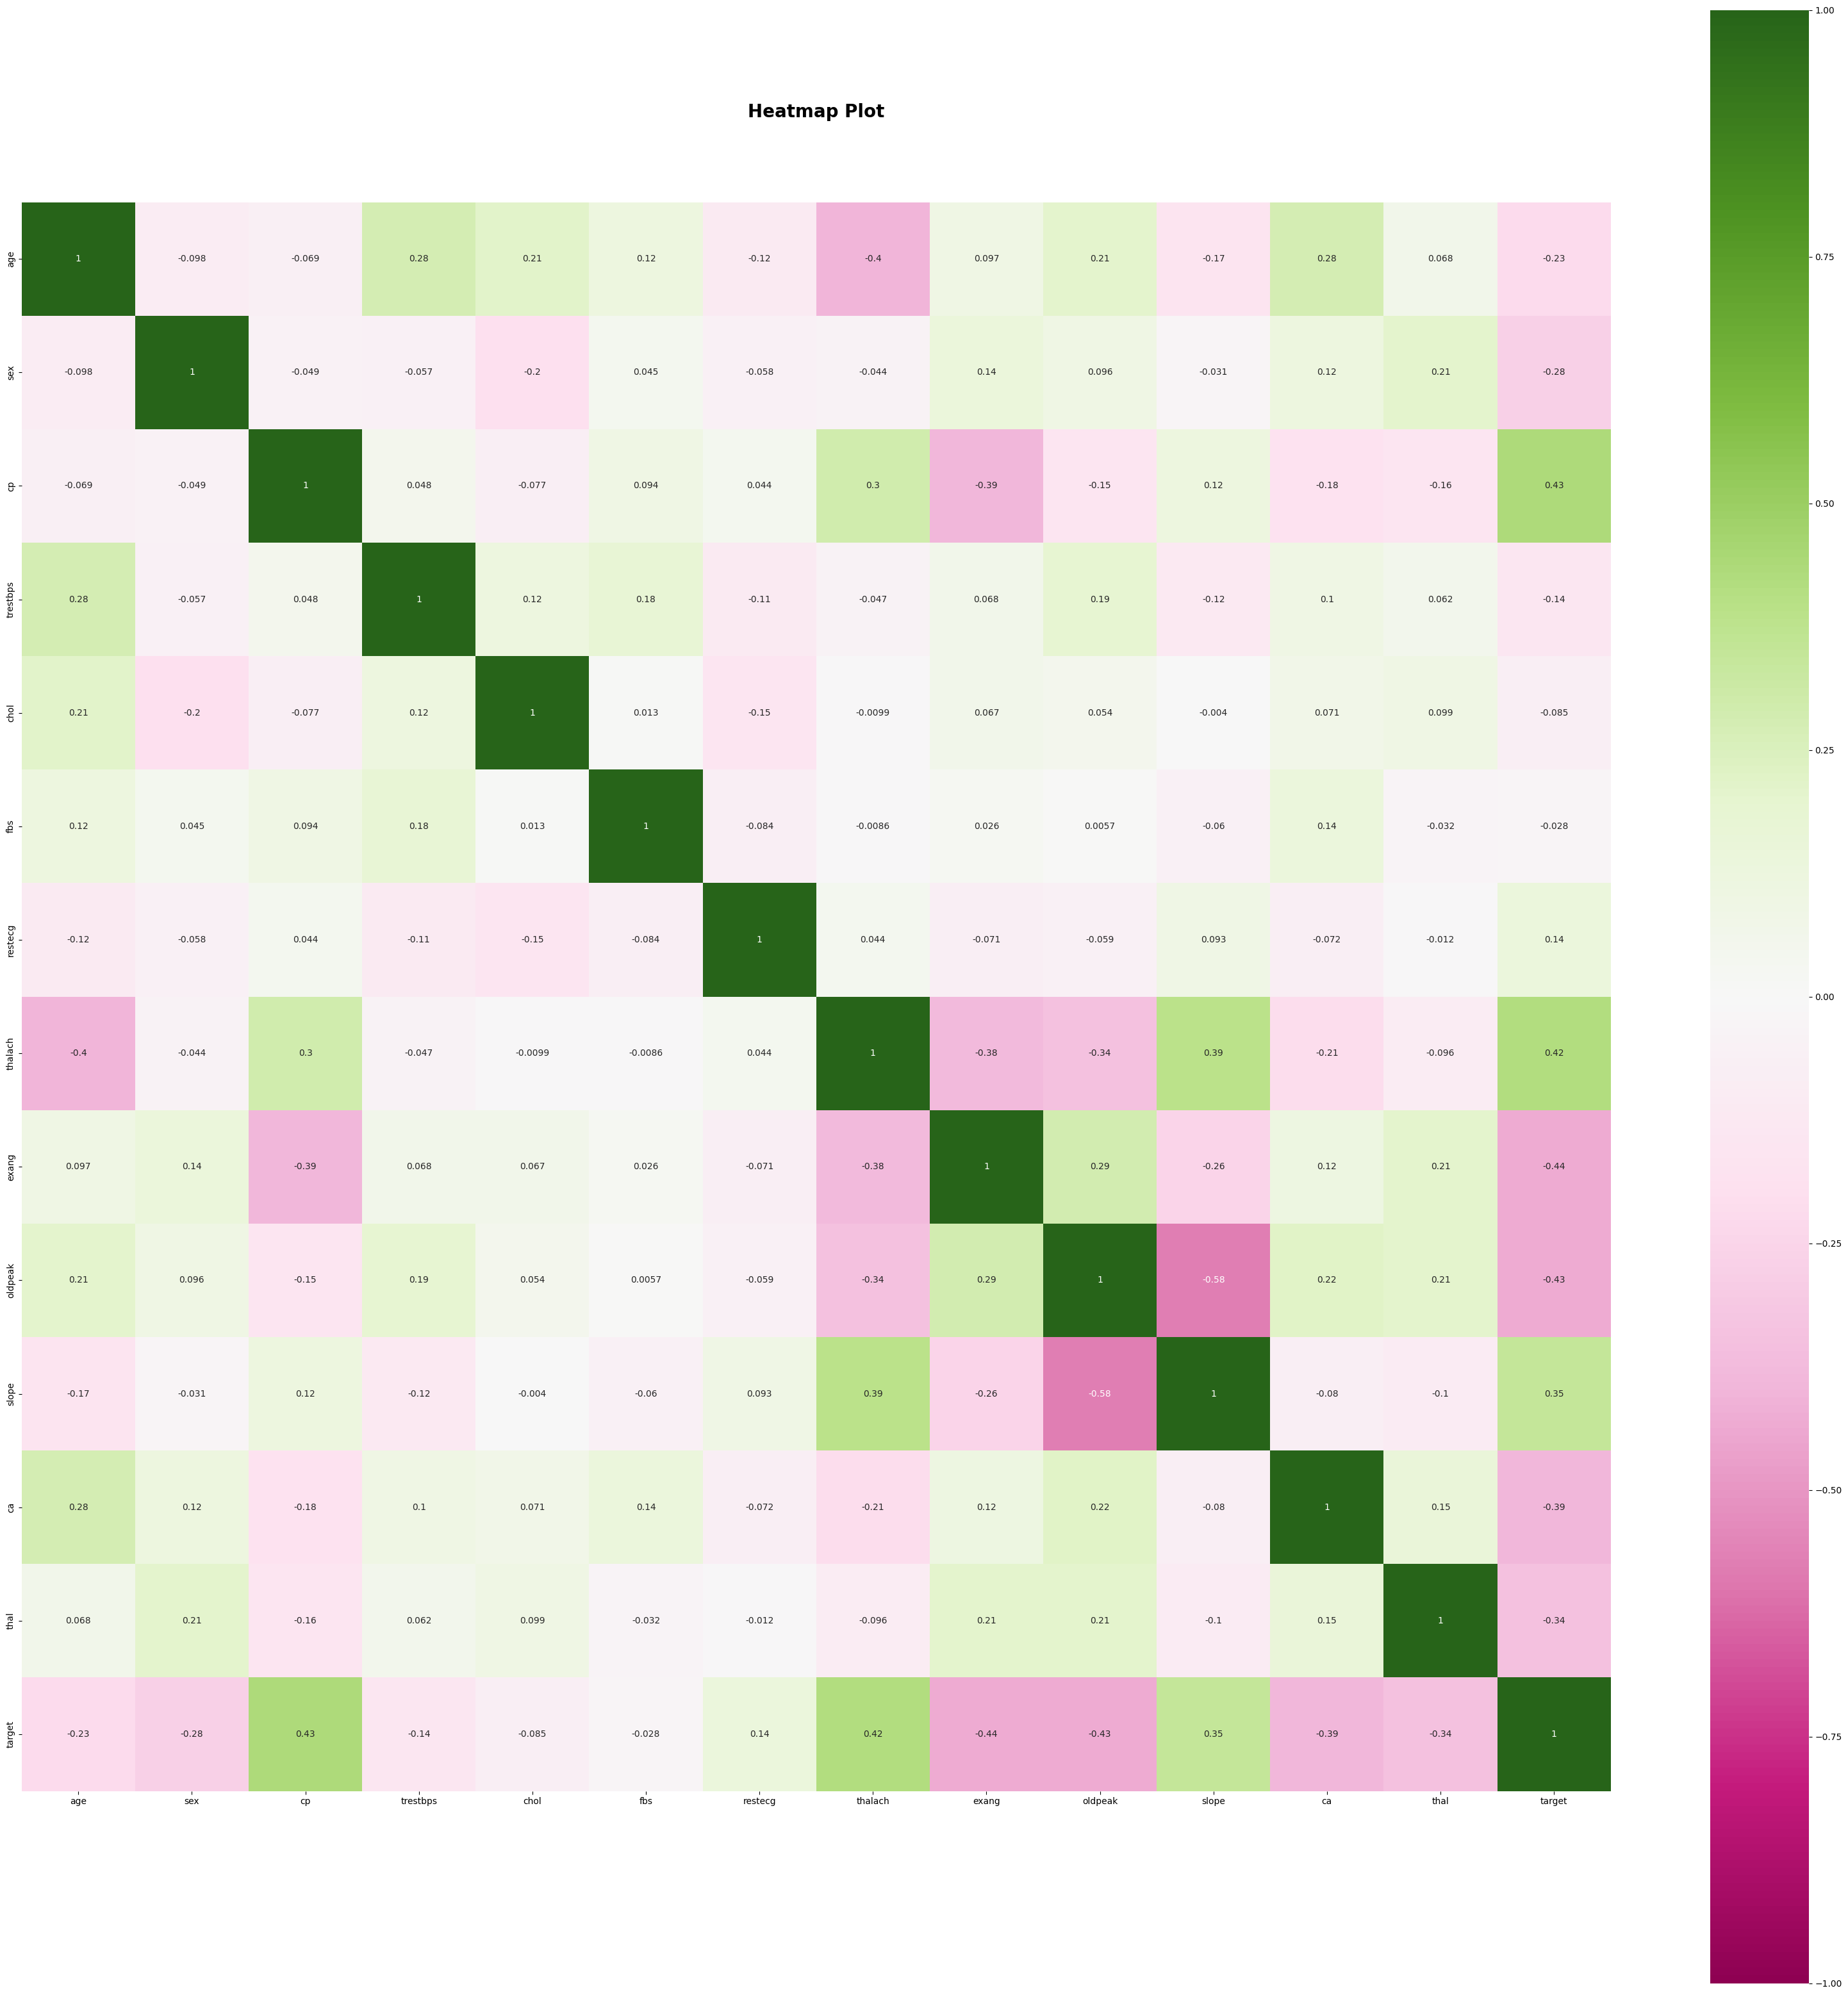

In [91]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='PiYG',
            annot=True,
            square=True);
plt.title('Heatmap Plot',fontsize=20, fontweight='bold', y=1.05)


In [130]:
correlations = data.corr()['target']  # حذف ویژگی target از لیست همبستگی‌ها

# مرتب‌سازی ویژگی‌ها بر اساس همبستگی، به ترتیب نزولی
sorted_correlations = correlations.sort_values(ascending=False)

sorted_correlations

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

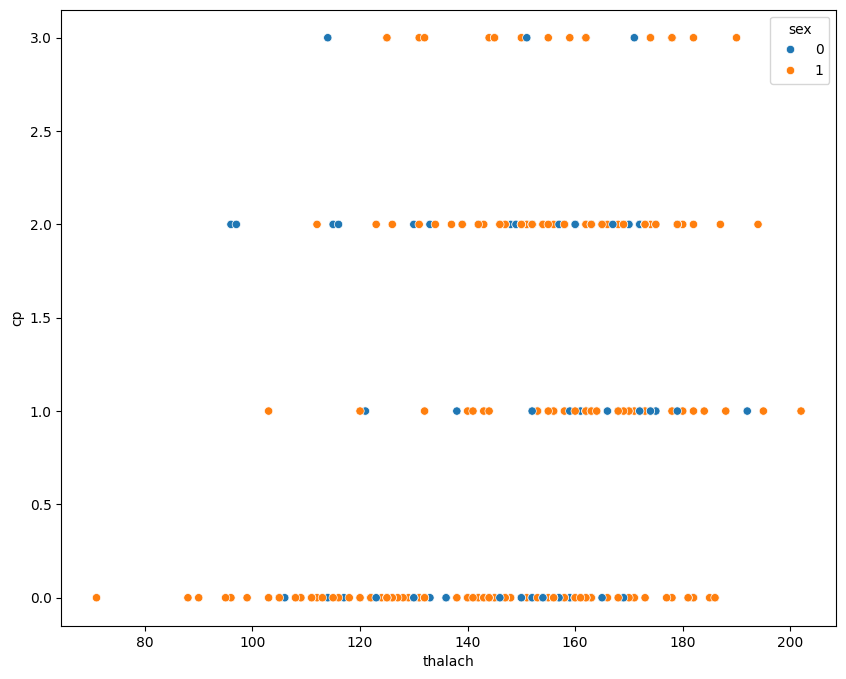

In [94]:
plt.figure(1,(10,8))
sns.scatterplot(data, x='thalach',y='cp',hue='sex')
plt.show()


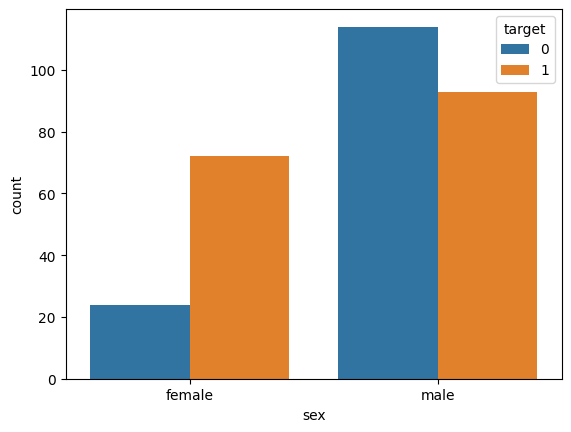

In [95]:
sns.countplot(data=data, x="sex", hue="target")
plt.xticks(ticks=[0, 1], labels=["female", "male"])
plt.show()

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\3045697025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=data["age"], palette='Dark2')


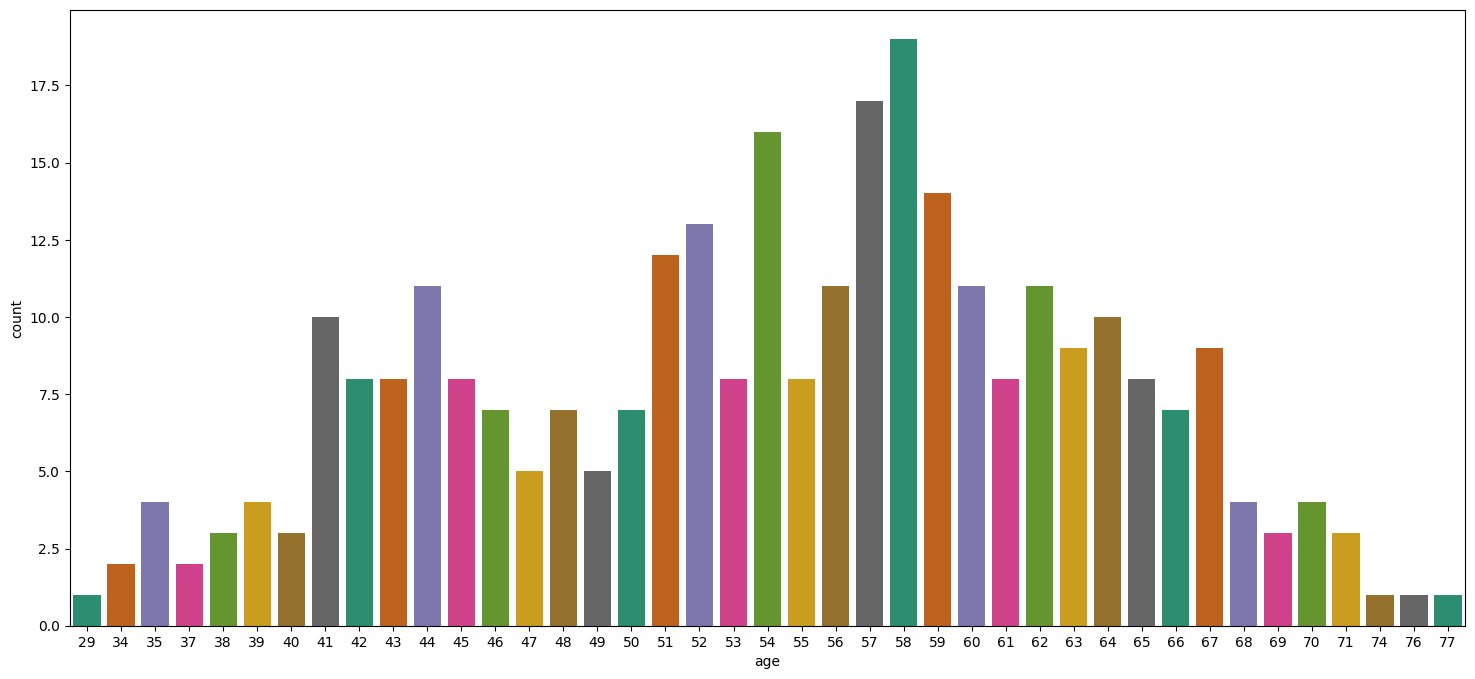

In [96]:
plt.figure(figsize=(18, 8))
sns.countplot(data, x=data["age"], palette='Dark2')
plt.show()

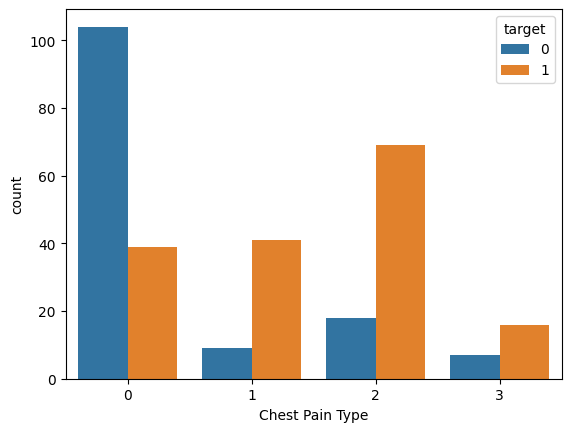

In [107]:
sns.countplot(data=data, x="cp", hue="target")
plt.xlabel("Chest Pain Type");

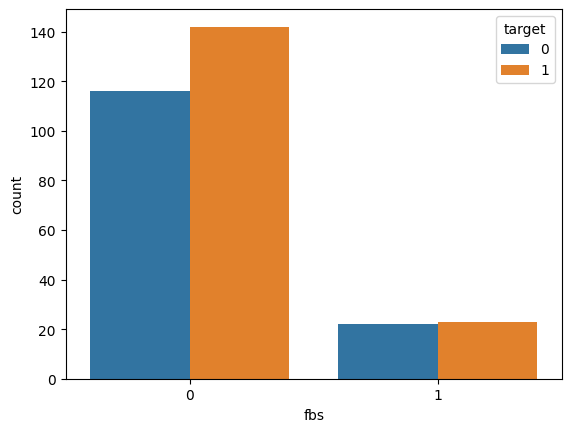

In [108]:
sns.countplot(data=data, x="fbs", hue="target");

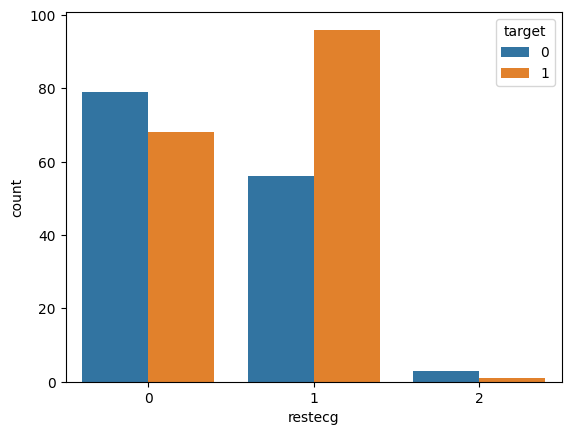

In [109]:
sns.countplot(data=data, x="restecg", hue="target");

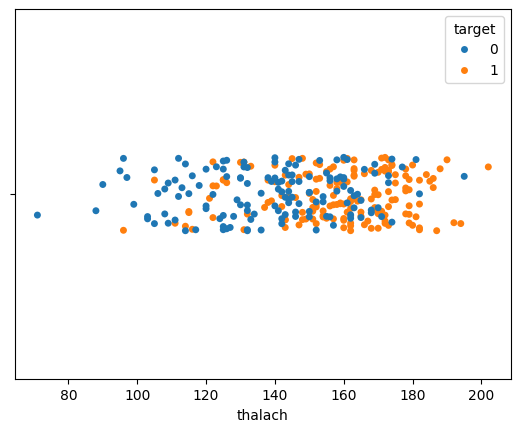

In [111]:
sns.stripplot(data=data, x="thalach", hue="target");

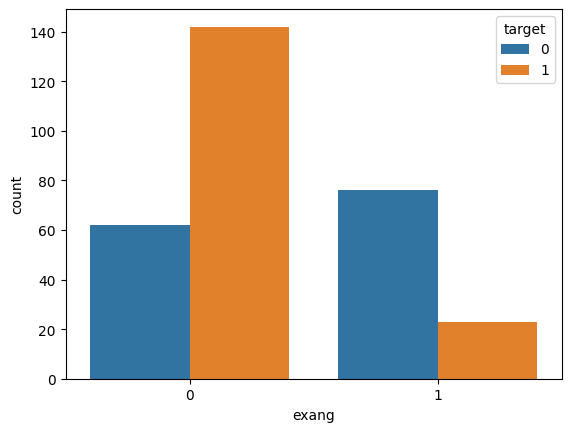

In [113]:
sns.countplot(data=data, x="exang", hue="target");

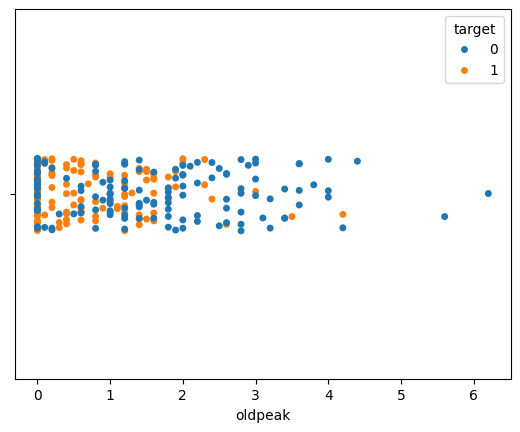

In [114]:
sns.stripplot(data=data, x="oldpeak", hue="target");

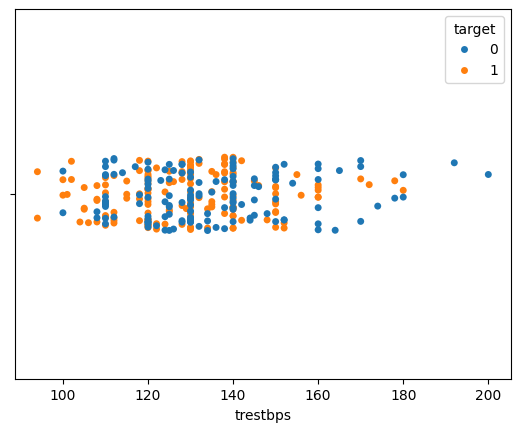

In [115]:
sns.stripplot(data=data, x="trestbps", hue="target");

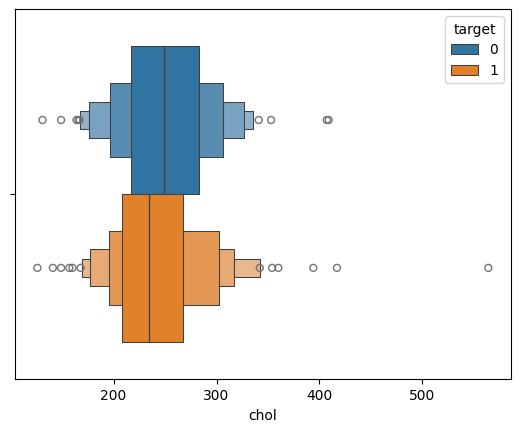

In [116]:
sns.boxenplot(data=data, x="chol", hue="target");

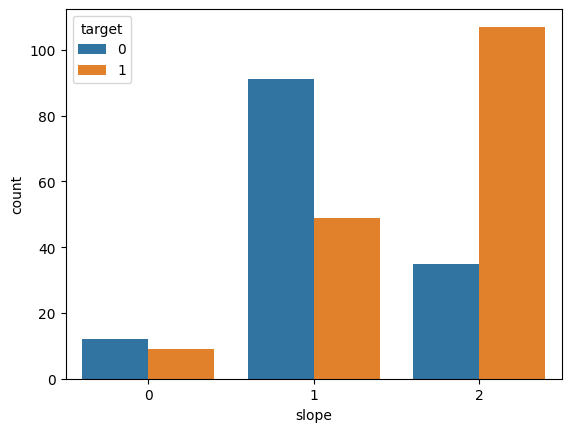

In [118]:
sns.countplot(data=data, x="slope", hue="target");

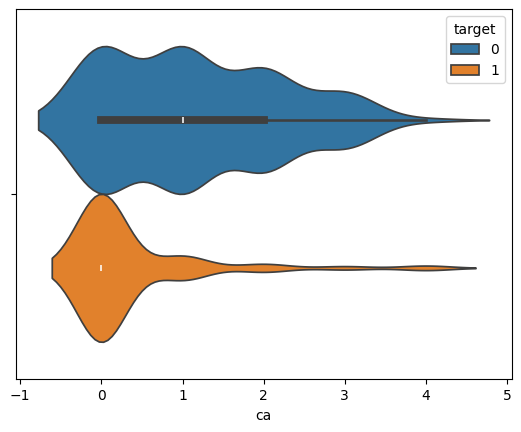

In [119]:
sns.violinplot(data=data, x="ca", hue="target");

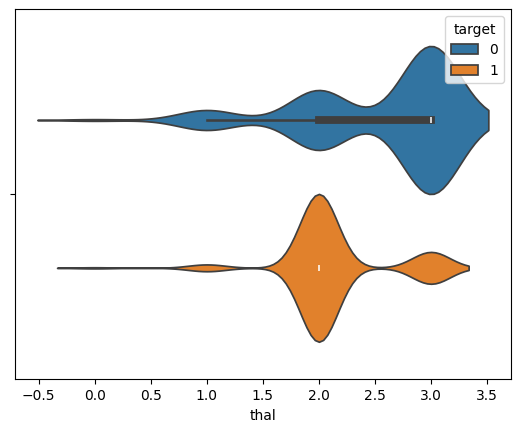

In [121]:
sns.violinplot(data=data, x="thal", hue="target");

C:\Users\omid\AppData\Local\Temp\ipykernel_7508\1209113595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], bins=15)


<Axes: xlabel='age', ylabel='Density'>

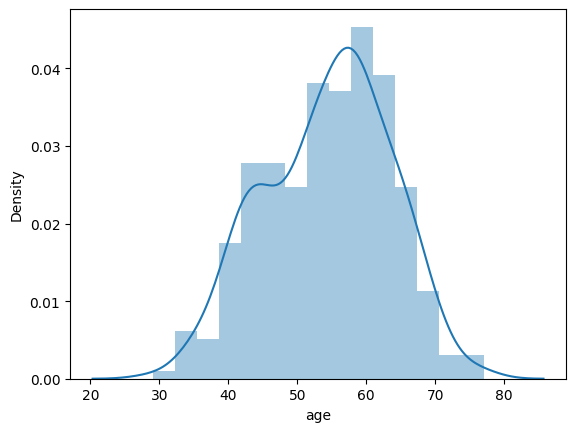

In [97]:
sns.distplot(data["age"], bins=15)

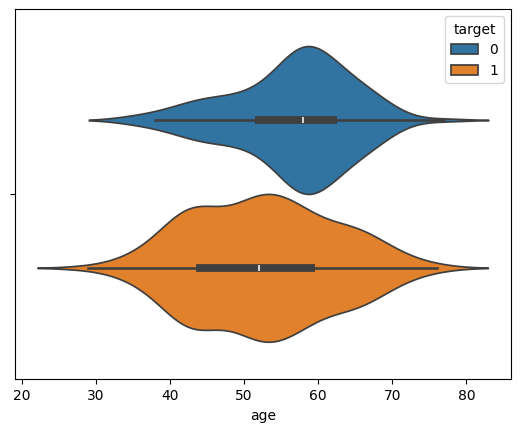

In [123]:
sns.violinplot(data=data, x="age", hue="target");

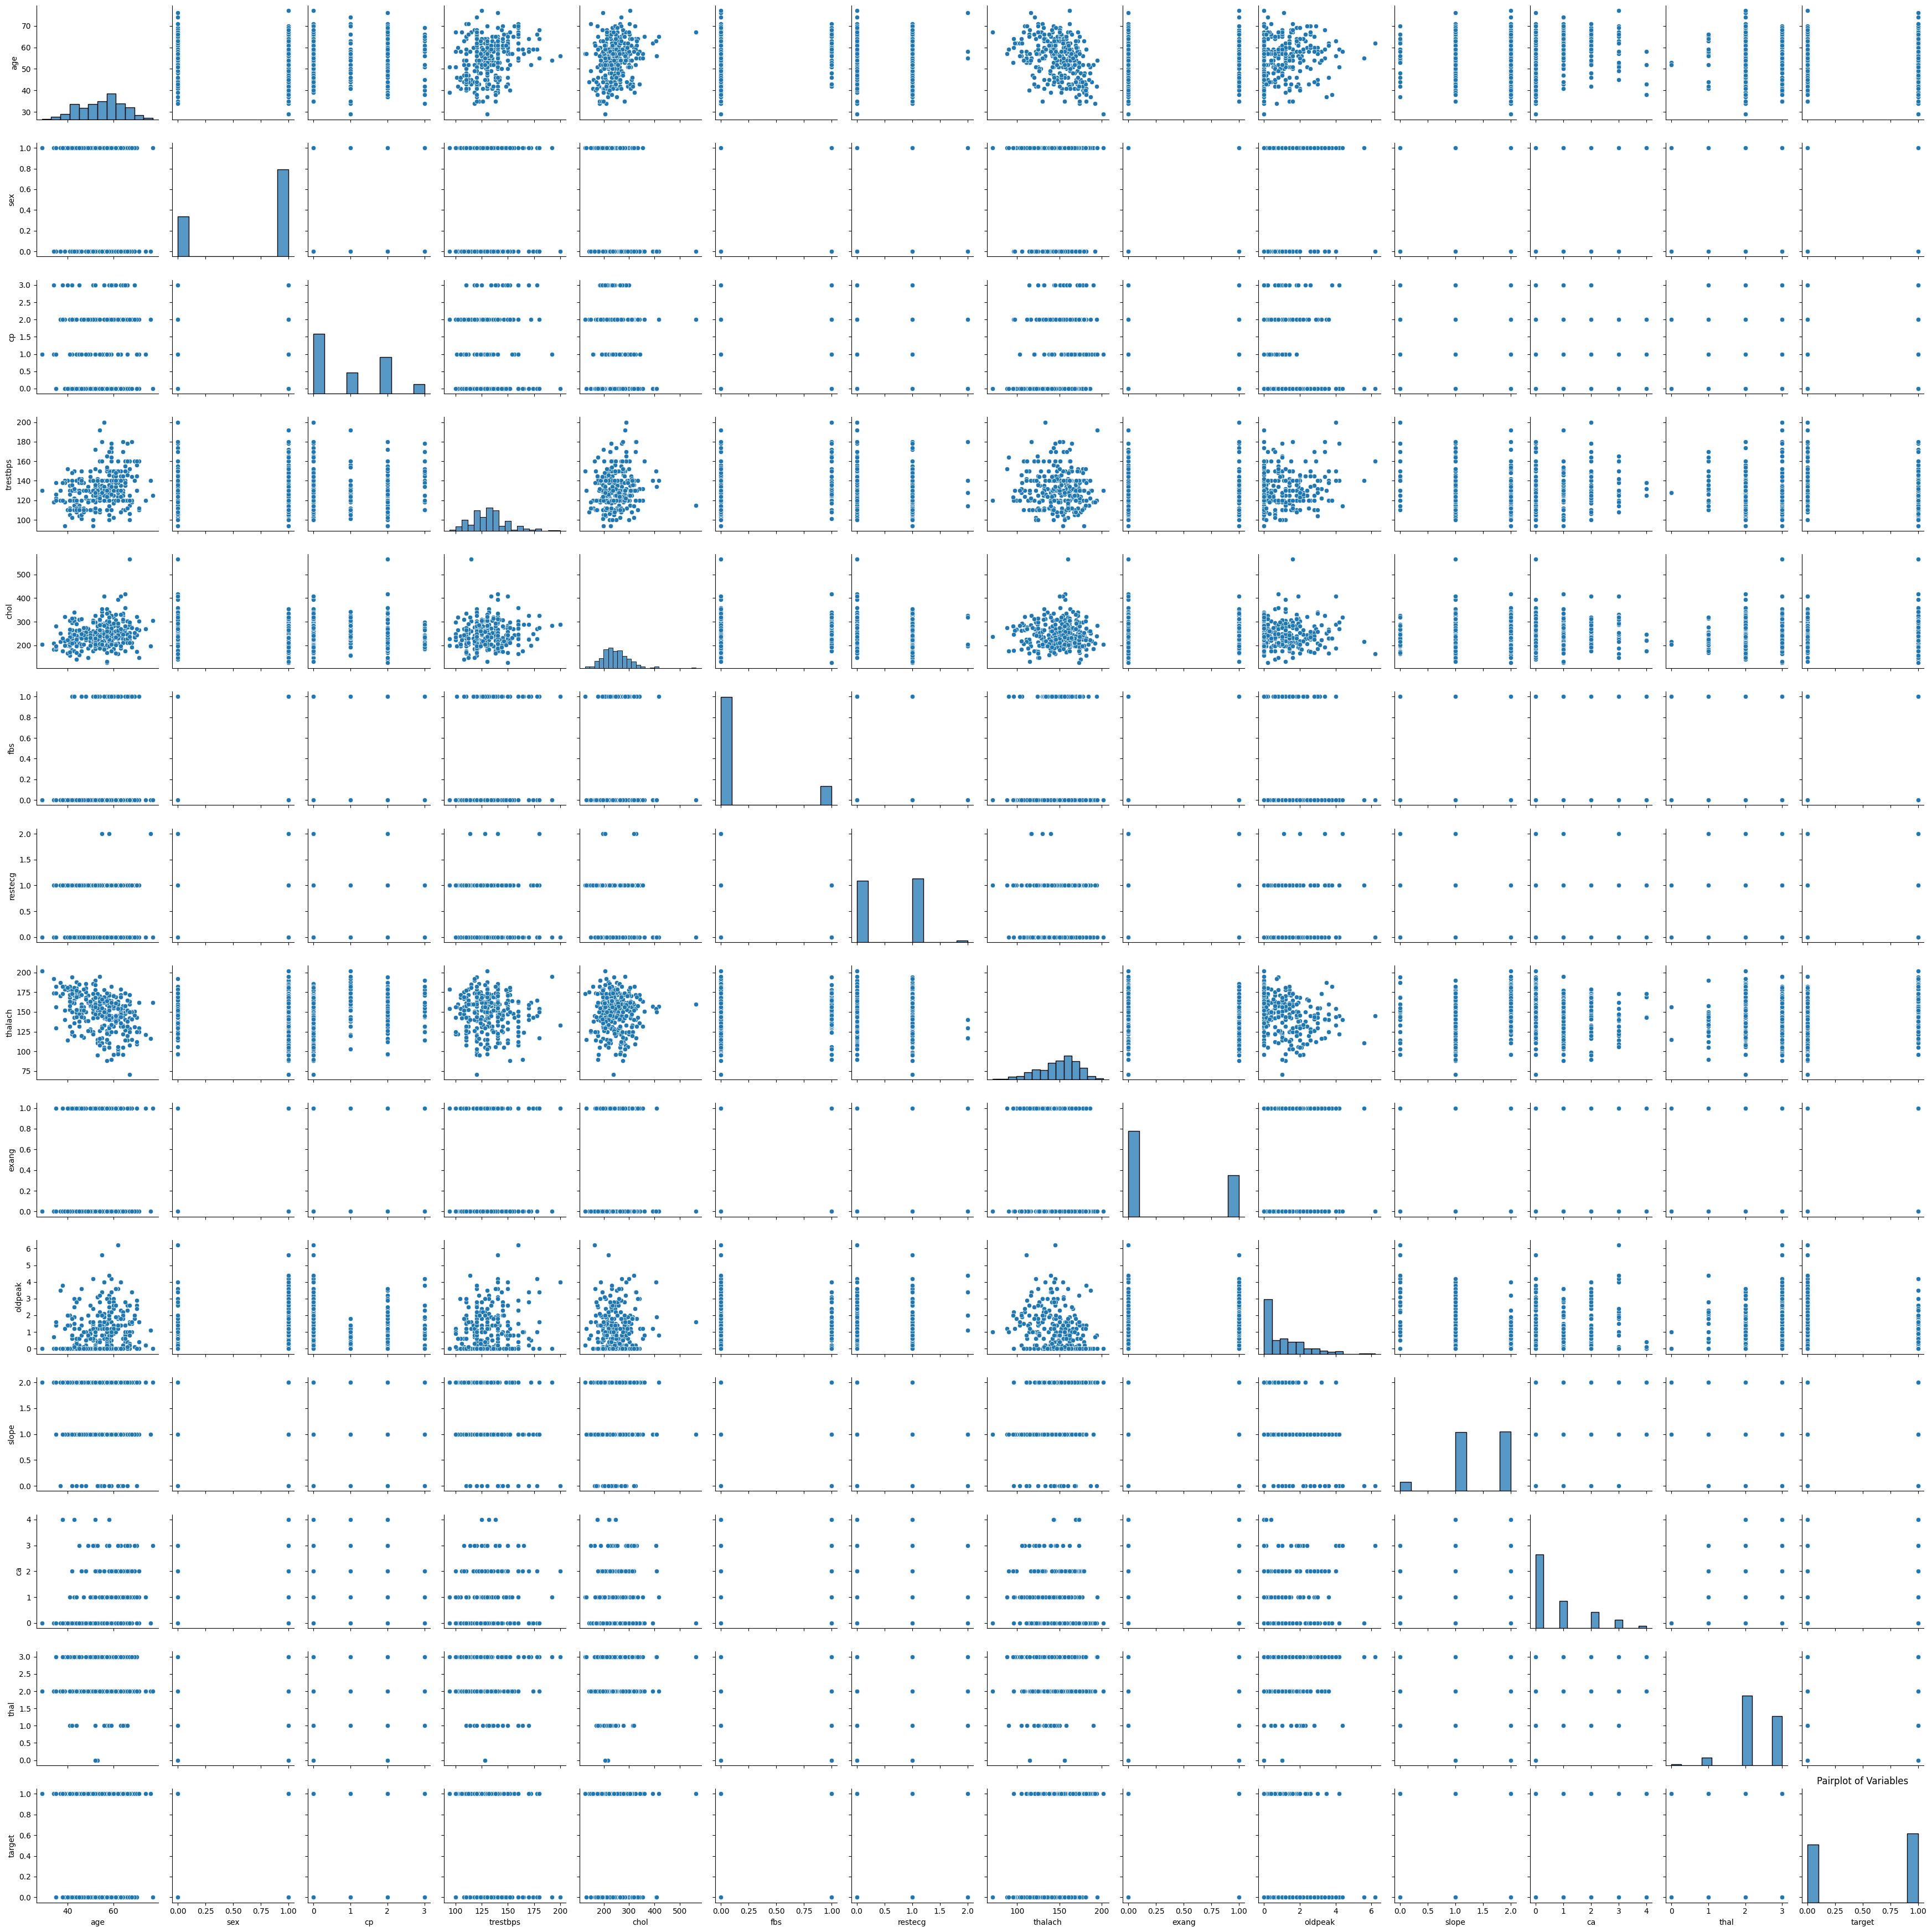

In [122]:
sns.pairplot(data)
plt.title('Pairplot of Variables')
plt.tight_layout()
plt.show()


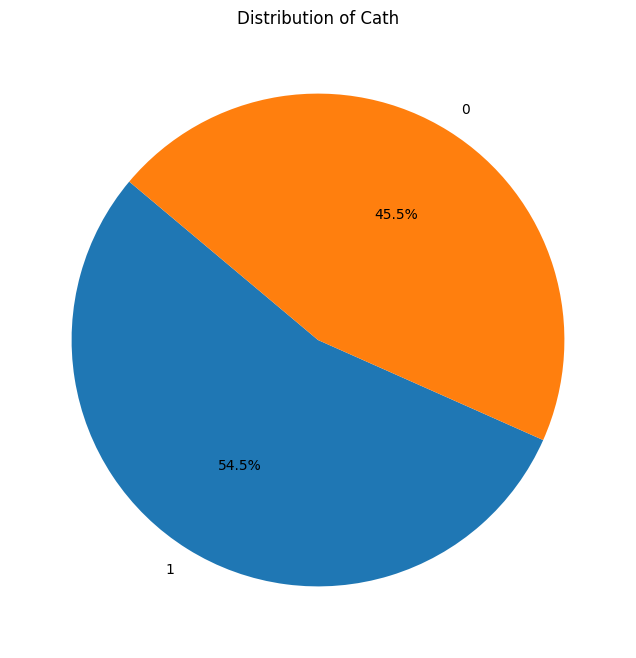

In [124]:
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=data['target'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cath')
plt.show()

In [85]:
# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']


In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [88]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', cmap=plt.colormaps['Blues']):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Logistic Regression...
Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[27  5]
 [ 4 25]]


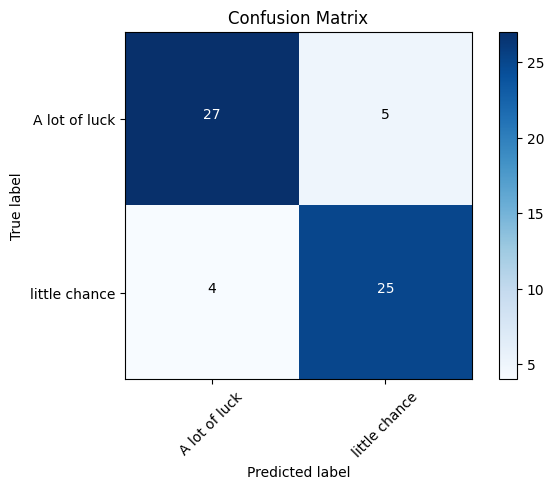

Training Decision Tree...
Accuracy:  0.84
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[25  7]
 [ 3 26]]


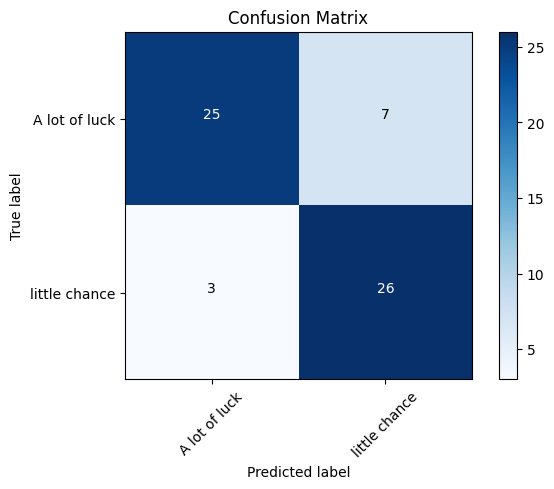

Training Random Forest...
Accuracy:  0.87
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[29  3]
 [ 5 24]]


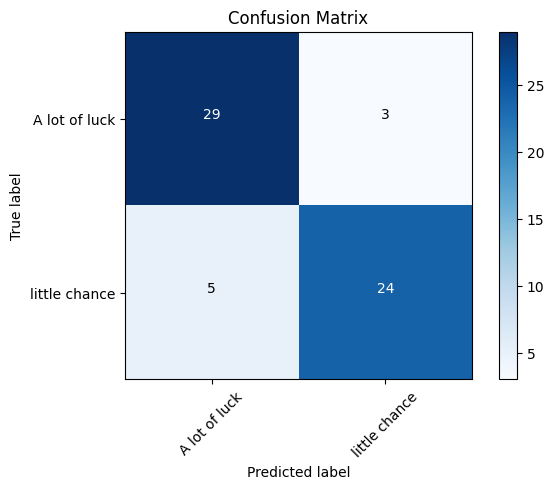

Training SVM...
Accuracy:  0.87
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[27  5]
 [ 3 26]]


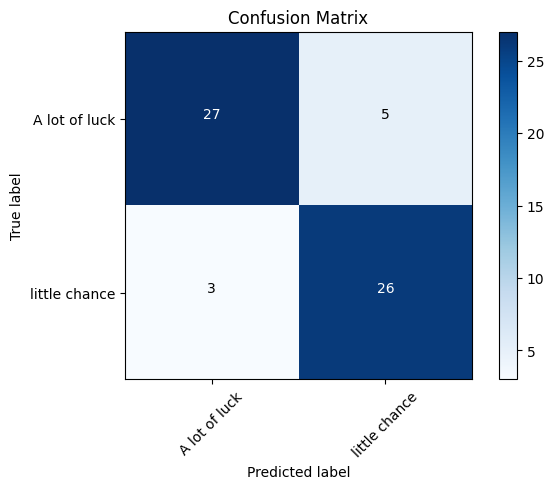

Training KNN...
Accuracy:  0.90
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[28  4]
 [ 2 27]]


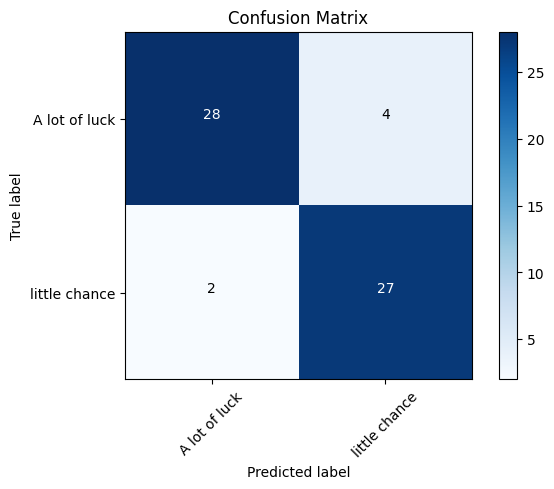

Training Gradient Boosting...
Accuracy:  0.79
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Confusion matrix, without normalization
[[25  7]
 [ 6 23]]


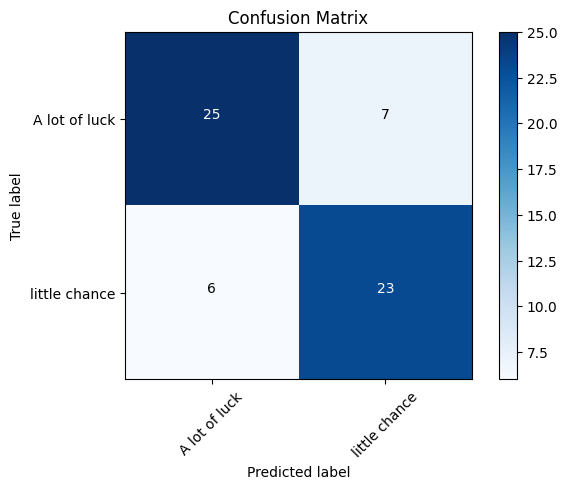

Training XGBoost...
Accuracy:  0.82
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix, without normalization
[[25  7]
 [ 4 25]]


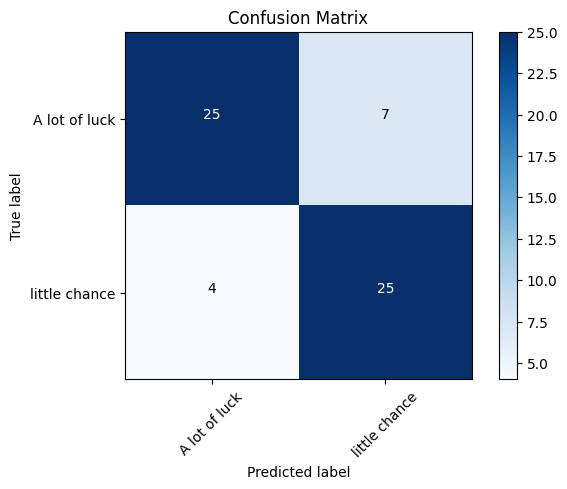

Training AdaBoost...
Accuracy:  0.80
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[24  8]
 [ 4 25]]


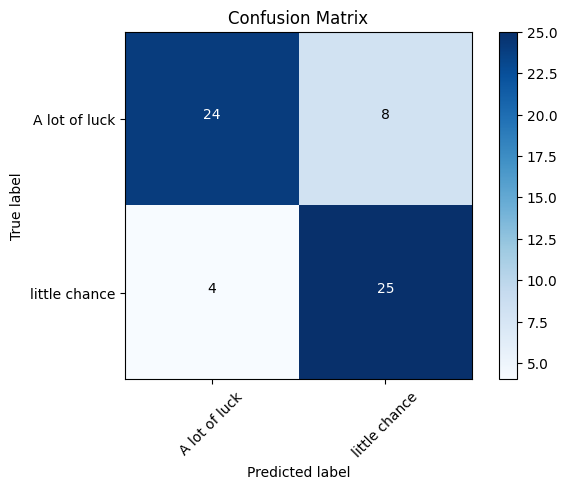

Training Naive Bayes...
Accuracy:  0.87
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion matrix, without normalization
[[27  5]
 [ 3 26]]


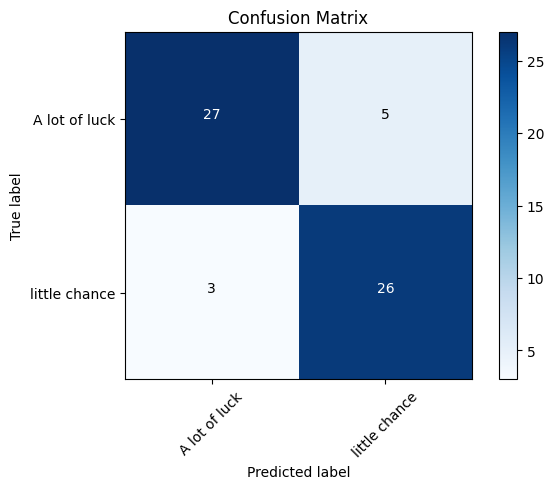

Training MLP Neural Network...
Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[27  5]
 [ 4 25]]


C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


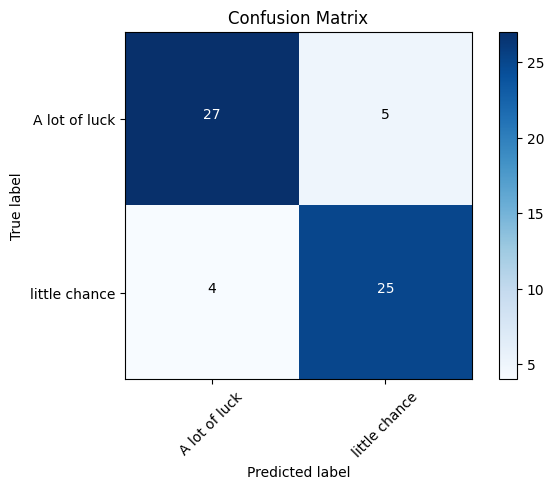

In [90]:
# تعریف مدل‌ها
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

def train_predict_plot_confusion_matrix(model, X_train, y_train, X_test, y_test):
     
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy: 2.2f}")
    
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    np.set_printoptions(precision=4)
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['A lot of luck', 'little chance'], normalize=False, title='Confusion Matrix')
    plt.show()

for name, model in models.items():
    print(f"Training {name}...")
    train_predict_plot_confusion_matrix(model, X_train, y_train, X_test, y_test)


In [125]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print("دقت مدل KNN روی داده تست:", KNN.score(X_test, y_test))


دقت مدل KNN روی داده تست: 0.9016393442622951


In [65]:
X = X.to_numpy()
y = y.to_numpy()

kf = KFold(n_splits=7, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # آموزش مدل
    KNN.fit(X_train, y_train)
    
    # پیش‌بینی
    y_pred = KNN.predict(X_test)
    
    # محاسبه دقت
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# محاسبه میانگین دقت‌ها
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.6365901540320145


In [75]:
user_inputs = {
    'age': float(input("Please enter age:")),
    'sex': float(input("Please enter sex (male=1, female=0):")),
    'cp': float(input("Type of chest pain (1, 2, 3, 4):")),
    'trestbps': float(input("Resting blood pressure:")),
    'chol': float(input("Blood fat:")),
    'fbs': float(input("Do you have diabetes? (yes=1, no=0):")),
    'restecg': float(input("ECG results at rest (normal=0, Abnormal ECG=1, Large left ventricle=2):")),
    'thalach': float(input("Maximum heart rate:")),
    'exang': float(input("Does the pain start with a specific activity? (yes=1, no=0):")),
    'oldpeak': float(input("Please enter oldpeak:")),
    'slope': float(input("Please enter slope:")),
    'ca': float(input("Number of main vessels:")),
    'thal': float(input("Please enter thal:"))

}


In [80]:
# تبدیل ورودی کاربر به DataFrame
user_input_df = pd.DataFrame(data=[user_inputs])

# مقیاس‌بندی ورودی کاربر
user_input_scaled = scaler.transform(user_input_df)

# تبدیل آرایه مقیاس‌بندی شده به DataFrame
user_input_df_scaled = pd.DataFrame(data=user_input_scaled, columns=user_inputs.keys())

# پیش‌بینی بر روی ورودی کاربر
prediction = model.predict(user_input_df_scaled)


C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [81]:
if prediction==1:
    print('you should see a doctor. Because your chances of heart attack are high')
else:
    print('Is it good. You have a small chance of having a heart attack')

Is it good. You have a small chance of having a heart attack
